## Sentdex Tutorial

https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/

* Series: similiar to a list but with a header and indices
* Pandas: DF's are way faster than Excel, but similiar to spreadsheet data. kinda like a python dictionary

Python > C++ cause it's very friendly + easy.
C++ is technically faster, but Python is 99.99% as fast as C bc Python in wrapped around C.

Why Pandas: efficient

In [1]:
import pandas as pd
import datetime
import pandas.io.data as web

//anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 8, 22)

In [3]:
df = web.DataReader("XOM", "yahoo", start, end)

In [4]:
print(df.head())

                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2010-01-04  68.720001  69.260002  68.190002  69.150002  27809100  57.203028
2010-01-05  69.190002  69.449997  68.800003  69.419998  30174700  57.426378
2010-01-06  69.449997  70.599998  69.339996  70.019997  35044700  57.922715
2010-01-07  69.900002  70.059998  69.419998  69.800003  27192100  57.740730
2010-01-08  69.690002  69.750000  69.220001  69.519997  24891800  57.509100


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

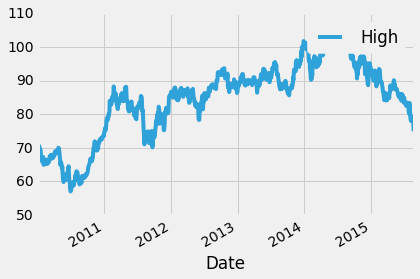

In [7]:
df['High'].plot()
plt.legend()
plt.show()

## Part 2

In [8]:
style.use('ggplot')

In [9]:
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

In [10]:
df = pd.DataFrame(web_stats)

In [11]:
df.head

<bound method DataFrame.head of    Bounce Rate  Day  Visitors
0           65    1        43
1           67    2        34
2           78    3        65
3           65    4        56
4           45    5        29
5           52    6        76>

In [14]:
print(df)

   Bounce Rate  Day  Visitors
0           65    1        43
1           67    2        34
2           78    3        65
3           65    4        56
4           45    5        29
5           52    6        76


In [15]:

print(df.tail)

<bound method DataFrame.tail of    Bounce Rate  Day  Visitors
0           65    1        43
1           67    2        34
2           78    3        65
3           65    4        56
4           45    5        29
5           52    6        76>


In [18]:
# this returns a new df
df.set_index('Day')

,Bounce Rate,Visitors
Day,,
1,65,43
2,67,34
3,78,65
4,65,56
5,45,29
6,52,76


In [17]:
df

,Bounce Rate,Day,Visitors
0,65,1,43
1,67,2,34
2,78,3,65
3,65,4,56
4,45,5,29
5,52,6,76


In [19]:
df = df.set_index('Day')

In [22]:
df.head()

,Bounce Rate,Visitors
Day,,
1,65,43
2,67,34
3,78,65
4,65,56
5,45,29


In [24]:
# use this, best practice
# df.set_index('Day', inplace=True)

In [25]:
print(df['Visitors'])

Day
1    43
2    34
3    65
4    56
5    29
6    76
Name: Visitors, dtype: int64


In [26]:
print(df.Visitors)

Day
1    43
2    34
3    65
4    56
5    29
6    76
Name: Visitors, dtype: int64


In [28]:
print(df[['Bounce Rate', 'Visitors']])

     Bounce Rate  Visitors
Day                       
1             65        43
2             67        34
3             78        65
4             65        56
5             45        29
6             52        76


In [30]:
print(df.Visitors.tolist())

[43, 34, 65, 56, 29, 76]


In [32]:
# doesn't work
# print(df[['Bounce Rate', 'Visitors']].tolist())

In [33]:
import numpy as np

In [34]:
print(np.array(df[['Bounce Rate', 'Visitors']]))

[[65 43]
 [67 34]
 [78 65]
 [65 56]
 [45 29]
 [52 76]]


In [35]:
df2 = pd.DataFrame(np.array(df[['Bounce Rate', 'Visitors']]))

In [36]:
df2.head()

,0,1
0,65,43
1,67,34
2,78,65
3,65,56
4,45,29


## Part 3 - Pandas IO

In [38]:
df = pd.read_csv('ZILL-Z02144_MLP.csv')

In [39]:
df.head(5)

,Date,Value
0,2015-02-28,869000.0
1,2015-01-31,749900.0
2,2014-12-31,749900.0
3,2014-11-30,599000.0
4,2014-10-31,609000.0


In [40]:
df.set_index('Date', inplace=True)

In [41]:
df.to_csv('newcsv2.csv') # creates a new CSV

In [43]:
df = pd.read_csv('newcsv2.csv')

In [44]:
df.head(5)

,Date,Value
0,2015-02-28,869000.0
1,2015-01-31,749900.0
2,2014-12-31,749900.0
3,2014-11-30,599000.0
4,2014-10-31,609000.0


In [45]:
df = pd.read_csv('newcsv2.csv', index_col=0)
df.head()

,Value
Date,
2015-02-28,869000.0
2015-01-31,749900.0
2014-12-31,749900.0
2014-11-30,599000.0
2014-10-31,609000.0


In [46]:
df.columns = ['Somerville_HPI']

In [47]:
print df.head()

            Somerville_HPI
Date                      
2015-02-28        869000.0
2015-01-31        749900.0
2014-12-31        749900.0
2014-11-30        599000.0
2014-10-31        609000.0


In [48]:
df.to_html('example.html')

In [49]:
# renaming only 1 column

# df.rename(columns={'Somerville_HPI': '02144_HPI'}, inplace=True)

## Part 4 - Building Dataset

Hypothesis: all markets follow the same path

In [1]:
import quandl
import pandas as pd
import html5lib

In [53]:
api_key = "v4pjxhoT6bBhSDcnwzba"

df = quandl.get('FMAC/HPI_AK', authtoken=api_key)

In [54]:
df.head()

,Value
Date,
1975-01-31,34.429922
1975-02-28,34.940483
1975-03-31,35.463028
1975-04-30,36.008230
1975-05-31,36.603608


In [4]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')

In [5]:
print(fiddy_states)

[               0               1               2                  3
0   Abbreviation      State Name         Capital     Became a State
1             AL         Alabama      Montgomery  December 14, 1819
2             AK          Alaska          Juneau    January 3, 1959
3             AZ         Arizona         Phoenix  February 14, 1912
4             AR        Arkansas     Little Rock      June 15, 1836
5             CA      California      Sacramento  September 9, 1850
6             CO        Colorado          Denver     August 1, 1876
7             CT     Connecticut        Hartford    January 9, 1788
8             DE        Delaware           Dover   December 7, 1787
9             FL         Florida     Tallahassee      March 3, 1845
10            GA         Georgia         Atlanta    January 2, 1788
11            HI          Hawaii        Honolulu    August 21, 1959
12            ID           Idaho           Boise       July 3, 1890
13            IL        Illinois     Springfiel

In [6]:
print(fiddy_states[0])

               0               1               2                  3
0   Abbreviation      State Name         Capital     Became a State
1             AL         Alabama      Montgomery  December 14, 1819
2             AK          Alaska          Juneau    January 3, 1959
3             AZ         Arizona         Phoenix  February 14, 1912
4             AR        Arkansas     Little Rock      June 15, 1836
5             CA      California      Sacramento  September 9, 1850
6             CO        Colorado          Denver     August 1, 1876
7             CT     Connecticut        Hartford    January 9, 1788
8             DE        Delaware           Dover   December 7, 1787
9             FL         Florida     Tallahassee      March 3, 1845
10            GA         Georgia         Atlanta    January 2, 1788
11            HI          Hawaii        Honolulu    August 21, 1959
12            ID           Idaho           Boise       July 3, 1890
13            IL        Illinois     Springfield

In [51]:
fiddy_states[0][0]

0     Abbreviation
1               AL
2               AK
3               AZ
4               AR
5               CA
6               CO
7               CT
8               DE
9               FL
10              GA
11              HI
12              ID
13              IL
14              IN
15              IA
16              KS
17              KY
18              LA
19              ME
20              MD
21              MA
22              MI
23              MN
24              MS
25              MO
26              MT
27              NE
28              NV
29              NH
30              NJ
31              NM
32              NY
33              NC
34              ND
35              OH
36              OK
37              OR
38              PA
39              RI
40              SC
41              SD
42              TN
43              TX
44              UT
45              VT
46              VA
47              WA
48              WV
49              WI
50              WY
Name: 0, dtype: object

In [52]:
for abbv in fiddy_states[0][0][1:]:
    print("FMAC/HPI_"+str(abbv))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


## Part 5 - Combining DFs (concat + append)

In [9]:
import pandas as pd

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [10]:
concat = pd.concat([df1, df2])

In [11]:
concat

,HPI,Int_rate,US_GDP_Thousands
2001,80,2,50
2002,85,3,55
2003,88,2,65
2004,85,2,55
2005,80,2,50
2006,85,3,55
2007,88,2,65
2008,85,2,55


In [12]:
concat = pd.concat([df1, df2, df3])

In [13]:
concat

,HPI,Int_rate,Low_tier_HPI,US_GDP_Thousands
2001,80,2,NaN,50.0
2002,85,3,NaN,55.0
2003,88,2,NaN,65.0
2004,85,2,NaN,55.0
2005,80,2,NaN,50.0
2006,85,3,NaN,55.0
2007,88,2,NaN,65.0
2008,85,2,NaN,55.0
2001,80,2,50.0,NaN
2002,85,3,52.0,NaN


In [14]:
df4 = df1.append(df2)

In [15]:
df4

,HPI,Int_rate,US_GDP_Thousands
2001,80,2,50
2002,85,3,55
2003,88,2,65
2004,85,2,55
2005,80,2,50
2006,85,3,55
2007,88,2,65
2008,85,2,55


don't confuse pandas for a database. it's not meant for updating, inserting, etc. info. it's meant for data analysis.

In [16]:
df5 = df1.append(df3)

In [17]:
df5

,HPI,Int_rate,Low_tier_HPI,US_GDP_Thousands
2001,80,2,NaN,50.0
2002,85,3,NaN,55.0
2003,88,2,NaN,65.0
2004,85,2,NaN,55.0
2001,80,2,50.0,NaN
2002,85,3,52.0,NaN
2003,88,2,50.0,NaN
2004,85,2,53.0,NaN


In [21]:
s = pd.Series([80, 2, 50], index=['HPI','Int_rate', 'US_GDP_Thousands'])

In [22]:
df4 = df1.append(s, ignore_index=True)

In [23]:
df4

,HPI,Int_rate,US_GDP_Thousands
0,80,2,50
1,85,3,55
2,88,2,65
3,85,2,55
4,80,2,50


## Part 6 - Joining and Merging

In [31]:
df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [27]:
print(pd.merge(df1,df2, on=['HPI', 'Int_rate']))

   HPI  Int_rate  US_GDP_Thousands_x  US_GDP_Thousands_y
0   80         2                  50                  50
1   85         3                  55                  55
2   88         2                  65                  65
3   85         2                  55                  55


Merging: combining different tables with one unique ID, want to merge on a specific column (not ideal to merge on index)

concat + append don't care about index

join honors index

Website: you normally wouldn't want all your user info in one table as it would take too long to run queries. instead spread across multiple tables with a unique ID for users. if you're changing db's you could merge all your tables to keep all info


left, right, outer, inner merges

* left: side it's on, merge on keys from left df 
* right: side it's on, merge on keys from right df 
* outer: union of the keys, all keys will be represented
* inner: default, keeps where the keys intersect


In [32]:
df1.set_index('HPI', inplace=True)

In [33]:
df3.set_index('HPI', inplace=True)

In [34]:
joined = df1.join(df3)

In [35]:
joined

,Int_rate,US_GDP_Thousands,Low_tier_HPI,Unemployment
HPI,,,,
80,2,50,50,7
85,3,55,52,8
85,3,55,53,6
85,2,55,52,8
85,2,55,53,6
88,2,65,50,9


In [36]:
df1 = pd.DataFrame({
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55],
                    'Year':[2001, 2002, 2003, 2004]
                    })

df3 = pd.DataFrame({
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53],
                    'Year':[2001, 2003, 2004, 2005]})

In [47]:
merged = pd.merge(df1, df3, on='Year', how='outer')

In [48]:
merged

,Int_rate,US_GDP_Thousands,Year,Low_tier_HPI,Unemployment
0,2.0,50.0,2001.0,50.0,7.0
1,3.0,55.0,2002.0,NaN,NaN
2,2.0,65.0,2003.0,52.0,8.0
3,2.0,55.0,2004.0,50.0,9.0
4,NaN,NaN,2005.0,53.0,6.0


In [42]:
merged.set_index('Year', inplace=True)

## Part 7 - Pickling

In [55]:
api_key = "v4pjxhoT6bBhSDcnwzba"

main_df = pd.DataFrame()

for abbv in fiddy_states[0][0][1:]:
    #print(abbv)
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    df.columns=[str(abbv)]
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)

In [56]:
main_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.352518,34.429922,28.986498,36.915892,15.658373,19.733454,24.540069,27.149328,30.966324,30.903720,...,37.819133,32.220321,32.692421,24.623431,26.514982,27.946567,17.483488,41.747656,28.201010,31.841466
1975-02-28,35.560502,34.940483,29.434129,37.258438,15.709276,19.936214,25.072001,27.175601,32.186781,30.605861,...,37.408511,32.262635,33.014756,24.959303,26.766762,28.240677,17.556608,42.772816,28.579312,32.298195
1975-03-31,35.808615,35.463028,29.855057,37.553594,15.896469,20.142459,25.471942,27.229797,33.997309,30.474467,...,36.990499,32.351378,33.600859,25.261821,27.009803,28.452989,17.666280,43.841779,28.954691,32.782285
1975-04-30,36.118785,36.008230,30.178300,37.778833,16.210823,20.341329,25.692525,27.354692,36.217076,30.533289,...,36.575237,32.482508,34.450742,25.502346,27.230758,28.603621,17.792424,44.946867,29.292735,33.285388
1975-05-31,36.418630,36.603608,30.345382,37.974779,16.475107,20.507966,25.752461,27.578663,36.491550,30.654248,...,36.199204,32.629937,34.707483,25.663357,27.425244,28.723425,17.899186,46.062928,29.568403,33.774387


In [57]:
import pickle

In [60]:
api_key = "v4pjxhoT6bBhSDcnwzba"

def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states

def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()
    
    for abbv in fiddy_states[0][0][1:]:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.columns=[str(abbv)]

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states.pickle', 'wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

In [61]:
grab_initial_state_data()

In [62]:
pickle_in = open('fiddy_states.pickle', 'rb')
HPI_data = pickle.load(pickle_in)
HPI_data

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.352518,34.429922,28.986498,36.915892,15.658373,19.733454,24.540069,27.149328,30.966324,30.903720,...,37.819133,32.220321,32.692421,24.623431,26.514982,27.946567,17.483488,41.747656,28.201010,31.841466
1975-02-28,35.560502,34.940483,29.434129,37.258438,15.709276,19.936214,25.072001,27.175601,32.186781,30.605861,...,37.408511,32.262635,33.014756,24.959303,26.766762,28.240677,17.556608,42.772816,28.579312,32.298195
1975-03-31,35.808615,35.463028,29.855057,37.553594,15.896469,20.142459,25.471942,27.229797,33.997309,30.474467,...,36.990499,32.351378,33.600859,25.261821,27.009803,28.452989,17.666280,43.841779,28.954691,32.782285
1975-04-30,36.118785,36.008230,30.178300,37.778833,16.210823,20.341329,25.692525,27.354692,36.217076,30.533289,...,36.575237,32.482508,34.450742,25.502346,27.230758,28.603621,17.792424,44.946867,29.292735,33.285388
1975-05-31,36.418630,36.603608,30.345382,37.974779,16.475107,20.507966,25.752461,27.578663,36.491550,30.654248,...,36.199204,32.629937,34.707483,25.663357,27.425244,28.723425,17.899186,46.062928,29.568403,33.774387
1975-06-30,36.590431,37.240909,30.299418,38.173701,16.593519,20.650164,25.707092,27.852721,34.875200,30.695045,...,35.919315,32.783404,34.285325,25.714293,27.601937,28.835049,18.007035,47.130662,29.774234,34.232998
1975-07-31,36.565213,37.878196,30.018416,38.344980,16.716877,20.753192,25.646639,28.102662,33.639176,30.588865,...,35.744964,32.936753,33.998231,25.653244,27.753585,29.007386,18.135447,48.067945,29.925117,34.660431
1975-08-31,36.374700,38.458854,29.576758,38.445324,16.936192,20.756217,25.627826,28.317456,33.048890,30.338242,...,35.625882,33.102663,33.966028,25.553272,27.861136,29.205064,18.227544,48.813819,30.046383,35.044777
1975-09-30,36.138194,38.964821,29.115252,38.445300,17.177919,20.684206,25.673500,28.495655,32.913035,29.988273,...,35.532350,33.332866,34.048300,25.510662,27.930537,29.285602,18.251837,49.311308,30.208194,35.374917


In [63]:
# pandas own pickling funcionality

HPI_data.to_pickle('pickle.pickle')
HPI_data2 = pd.read_pickle('pickle.pickle')

In [64]:
HPI_data2

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.352518,34.429922,28.986498,36.915892,15.658373,19.733454,24.540069,27.149328,30.966324,30.903720,...,37.819133,32.220321,32.692421,24.623431,26.514982,27.946567,17.483488,41.747656,28.201010,31.841466
1975-02-28,35.560502,34.940483,29.434129,37.258438,15.709276,19.936214,25.072001,27.175601,32.186781,30.605861,...,37.408511,32.262635,33.014756,24.959303,26.766762,28.240677,17.556608,42.772816,28.579312,32.298195
1975-03-31,35.808615,35.463028,29.855057,37.553594,15.896469,20.142459,25.471942,27.229797,33.997309,30.474467,...,36.990499,32.351378,33.600859,25.261821,27.009803,28.452989,17.666280,43.841779,28.954691,32.782285
1975-04-30,36.118785,36.008230,30.178300,37.778833,16.210823,20.341329,25.692525,27.354692,36.217076,30.533289,...,36.575237,32.482508,34.450742,25.502346,27.230758,28.603621,17.792424,44.946867,29.292735,33.285388
1975-05-31,36.418630,36.603608,30.345382,37.974779,16.475107,20.507966,25.752461,27.578663,36.491550,30.654248,...,36.199204,32.629937,34.707483,25.663357,27.425244,28.723425,17.899186,46.062928,29.568403,33.774387
1975-06-30,36.590431,37.240909,30.299418,38.173701,16.593519,20.650164,25.707092,27.852721,34.875200,30.695045,...,35.919315,32.783404,34.285325,25.714293,27.601937,28.835049,18.007035,47.130662,29.774234,34.232998
1975-07-31,36.565213,37.878196,30.018416,38.344980,16.716877,20.753192,25.646639,28.102662,33.639176,30.588865,...,35.744964,32.936753,33.998231,25.653244,27.753585,29.007386,18.135447,48.067945,29.925117,34.660431
1975-08-31,36.374700,38.458854,29.576758,38.445324,16.936192,20.756217,25.627826,28.317456,33.048890,30.338242,...,35.625882,33.102663,33.966028,25.553272,27.861136,29.205064,18.227544,48.813819,30.046383,35.044777
1975-09-30,36.138194,38.964821,29.115252,38.445300,17.177919,20.684206,25.673500,28.495655,32.913035,29.988273,...,35.532350,33.332866,34.048300,25.510662,27.930537,29.285602,18.251837,49.311308,30.208194,35.374917


## Part 8 - Percent Change and Correlation Tables

In [1]:
import quandl
import pandas as pd
import pickle
import html5lib

# Not necessary, I just do this so I do not show my API key.
# api_key = open('quandlapikey.txt','r').read()
api_key = "v4pjxhoT6bBhSDcnwzba"



def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.columns=[str(abbv)]
        # print(query)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()        

HPI_data = pd.read_pickle('fiddy_states.pickle')

In [2]:
grab_initial_state_data()

In [3]:
pickle_in = open('fiddy_states.pickle', 'rb')
HPI_data = pickle.load(pickle_in)
HPI_data

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.352518,34.429922,28.986498,36.915892,15.658373,19.733454,24.540069,27.149328,30.966324,30.903720,...,37.819133,32.220321,32.692421,24.623431,26.514982,27.946567,17.483488,41.747656,28.201010,31.841466
1975-02-28,35.560502,34.940483,29.434129,37.258438,15.709276,19.936214,25.072001,27.175601,32.186781,30.605861,...,37.408511,32.262635,33.014756,24.959303,26.766762,28.240677,17.556608,42.772816,28.579312,32.298195
1975-03-31,35.808615,35.463028,29.855057,37.553594,15.896469,20.142459,25.471942,27.229797,33.997309,30.474467,...,36.990499,32.351378,33.600859,25.261821,27.009803,28.452989,17.666280,43.841779,28.954691,32.782285
1975-04-30,36.118785,36.008230,30.178300,37.778833,16.210823,20.341329,25.692525,27.354692,36.217076,30.533289,...,36.575237,32.482508,34.450742,25.502346,27.230758,28.603621,17.792424,44.946867,29.292735,33.285388
1975-05-31,36.418630,36.603608,30.345382,37.974779,16.475107,20.507966,25.752461,27.578663,36.491550,30.654248,...,36.199204,32.629937,34.707483,25.663357,27.425244,28.723425,17.899186,46.062928,29.568403,33.774387
1975-06-30,36.590431,37.240909,30.299418,38.173701,16.593519,20.650164,25.707092,27.852721,34.875200,30.695045,...,35.919315,32.783404,34.285325,25.714293,27.601937,28.835049,18.007035,47.130662,29.774234,34.232998
1975-07-31,36.565213,37.878196,30.018416,38.344980,16.716877,20.753192,25.646639,28.102662,33.639176,30.588865,...,35.744964,32.936753,33.998231,25.653244,27.753585,29.007386,18.135447,48.067945,29.925117,34.660431
1975-08-31,36.374700,38.458854,29.576758,38.445324,16.936192,20.756217,25.627826,28.317456,33.048890,30.338242,...,35.625882,33.102663,33.966028,25.553272,27.861136,29.205064,18.227544,48.813819,30.046383,35.044777
1975-09-30,36.138194,38.964821,29.115252,38.445300,17.177919,20.684206,25.673500,28.495655,32.913035,29.988273,...,35.532350,33.332866,34.048300,25.510662,27.930537,29.285602,18.251837,49.311308,30.208194,35.374917


In [5]:
HPI_data['TX2'] = HPI_data['TX'] * 2
HPI_data[['TX', 'TX2']]

,TX,TX2
Date,,
1975-01-31,32.692421,65.384843
1975-02-28,33.014756,66.029512
1975-03-31,33.600859,67.201718
1975-04-30,34.450742,68.901484
1975-05-31,34.707483,69.414966
1975-06-30,34.285325,68.570651
1975-07-31,33.998231,67.996462
1975-08-31,33.966028,67.932056
1975-09-30,34.048300,68.096601


In [ ]:
# del df['column_name']

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

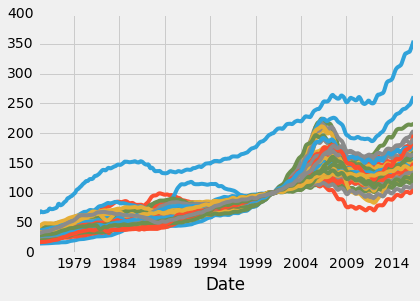

In [9]:
HPI_data.plot()
plt.legend().remove()
plt.show()

In [10]:
del HPI_data['TX2']

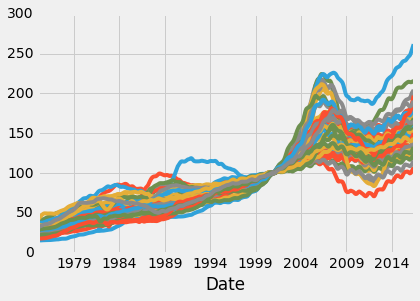

In [11]:
HPI_data.plot()
plt.legend().remove()
plt.show()

In [12]:
def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.columns=[str(abbv)]
        df = df.pct_change()
        print(df.head())
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states2.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

grab_initial_state_data() 

                  AL
Date                
1975-01-31       NaN
1975-02-28  0.005883
1975-03-31  0.006977
1975-04-30  0.008662
1975-05-31  0.008302
                  AK
Date                
1975-01-31       NaN
1975-02-28  0.014829
1975-03-31  0.014955
1975-04-30  0.015374
1975-05-31  0.016535
                  AZ
Date                
1975-01-31       NaN
1975-02-28  0.015443
1975-03-31  0.014301
1975-04-30  0.010827
1975-05-31  0.005536
                  AR
Date                
1975-01-31       NaN
1975-02-28  0.009279
1975-03-31  0.007922
1975-04-30  0.005998
1975-05-31  0.005187
                  CA
Date                
1975-01-31       NaN
1975-02-28  0.003251
1975-03-31  0.011916
1975-04-30  0.019775
1975-05-31  0.016303
                  CO
Date                
1975-01-31       NaN
1975-02-28  0.010275
1975-03-31  0.010345
1975-04-30  0.009873
1975-05-31  0.008192
                  CT
Date                
1975-01-31       NaN
1975-02-28  0.021676
1975-03-31  0.015952
1975-04-30  0

In [13]:
HPI_data = pd.read_pickle('fiddy_states2.pickle')

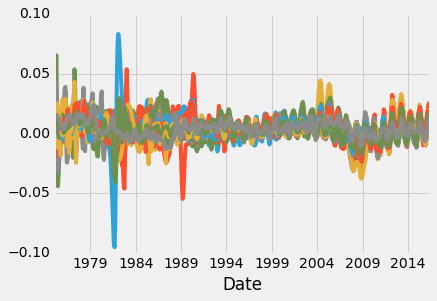

In [14]:
HPI_data.plot()
plt.legend().remove()
plt.show()

In [15]:
def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.columns = [str(abbv)]
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
#         print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states3.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

In [16]:
grab_initial_state_data()

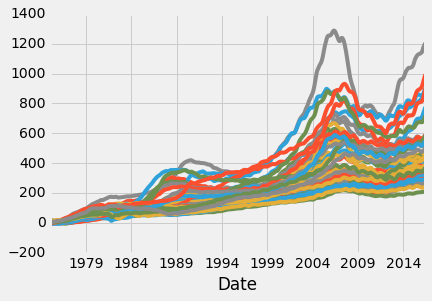

In [17]:
HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data.plot()
plt.legend().remove()
plt.show()

In [20]:
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df.rename(columns={'Value':'United States'}, inplace=True)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

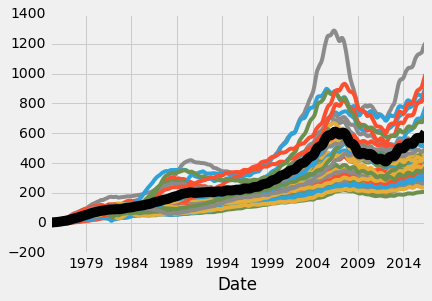

In [21]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')
benchmark = HPI_Benchmark()
HPI_data.plot(ax=ax1)
benchmark.plot(color='k',ax=ax1, linewidth=10)

plt.legend().remove()
plt.show()

In [22]:
HPI_data = pd.read_pickle('fiddy_states3.pickle')
HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation)

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.945692  0.936728  0.995042  0.941743  0.967083  0.953487   
AK  0.945692  1.000000  0.908622  0.967463  0.920128  0.960014  0.885376   
AZ  0.936728  0.908622  1.000000  0.935301  0.976469  0.918973  0.918106   
AR  0.995042  0.967463  0.935301  1.000000  0.944930  0.978252  0.945202   
CA  0.941743  0.920128  0.976469  0.944930  1.000000  0.937811  0.944235   
CO  0.967083  0.960014  0.918973  0.978252  0.937811  1.000000  0.893097   
CT  0.953487  0.885376  0.918106  0.945202  0.944235  0.893097  1.000000   
DE  0.982747  0.937913  0.948622  0.977865  0.968628  0.939065  0.979959   
FL  0.928340  0.898749  0.994311  0.926688  0.985587  0.909619  0.927121   
GA  0.978070  0.897351  0.948222  0.967694  0.950608  0.956187  0.948240   
HI  0.944246  0.946260  0.915370  0.951000  0.950088  0.926591  0.917323   
ID  0.983391  0.952230  0.964709  0.980763  0.953688  0.961998  0.919456   
IL  0.983716

In [25]:
HPI_State_Correlation['MA'].describe()

count    50.000000
mean      0.957947
std       0.026952
min       0.876798
25%       0.941415
50%       0.966811
75%       0.978309
max       1.000000
Name: MA, dtype: float64

In [26]:
HPI_State_Correlation.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.969216,0.938345,0.931784,0.971001,0.945204,0.954900,0.932737,0.963632,0.928215,0.952096,...,0.959238,0.969968,0.934979,0.956732,0.962119,0.965931,0.968050,0.962739,0.964372,0.937769
std,0.027081,0.043626,0.028486,0.027354,0.025616,0.030183,0.038855,0.028773,0.032641,0.028475,...,0.036999,0.027535,0.041463,0.032637,0.031779,0.027141,0.024831,0.033866,0.026649,0.045755
min,0.870697,0.767261,0.843642,0.859224,0.868238,0.836988,0.826082,0.862880,0.829101,0.846934,...,0.805976,0.854587,0.787797,0.846671,0.835967,0.843833,0.869855,0.827325,0.882188,0.763650
25%,0.955166,0.929084,0.916459,0.964683,0.930588,0.939833,0.908279,0.951740,0.909616,0.943937,...,0.951761,0.958656,0.917978,0.942358,0.955746,0.961303,0.958636,0.953735,0.954476,0.919689
50%,0.977045,0.948279,0.933975,0.978058,0.944489,0.961006,0.938836,0.970836,0.927870,0.956343,...,0.969921,0.976056,0.942784,0.961759,0.969697,0.973828,0.974505,0.974652,0.970204,0.949021
75%,0.986453,0.962778,0.947847,0.989075,0.963868,0.975442,0.959442,0.980815,0.949989,0.970216,...,0.983095,0.987435,0.963055,0.980882,0.978793,0.978779,0.983782,0.985095,0.984736,0.963568
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 9 - Resampling